In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/training_set', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')


Found 8005 images belonging to 1 classes.


In [7]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/test_set', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')


Found 2023 images belonging to 1 classes.


In [8]:
''' container '''
model = tf.keras.models.Sequential()


In [9]:
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


c:\Users\Mohan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [11]:
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))


In [12]:
''' flattening '''
model.add(tf.keras.layers.Flatten())


In [13]:
''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))


In [14]:
''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [15]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)


Epoch 1/25


c:\Users\Mohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 93s 352ms/step - accuracy: 0.9811 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 1.0000 - loss: 1.2045e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 1.0000 - loss: 1.6654e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 140ms/step - accuracy: 1.0000 - loss: 8.3310e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 1.0000 - loss: 2.3688e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 1.0000 - loss: 3.7701e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 1.0000 - loss: 1.7607e-13 - val_accuracy: 1.0000 - val_loss: 1.0504e-15
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 36

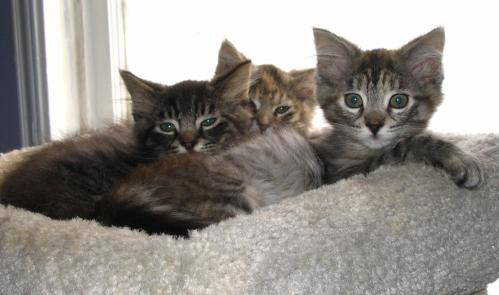

In [39]:
''' plotting cat image '''
image.load_img('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/training_set/training_set/cats/cat.1441.jpg')


In [40]:
''' prediction '''
test_img = image.load_img('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/training_set/training_set/cats/cat.1441.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis=0)

''' prediction '''
r = model.predict(img)
train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [41]:
print(pred)


cat


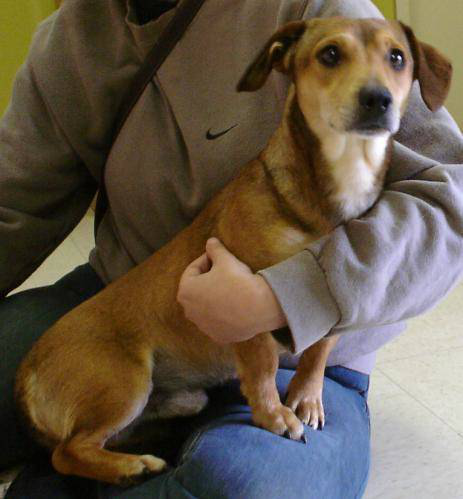

In [42]:
''' plotting dog image '''
image.load_img('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/training_set/training_set/dogs/dog.1280.jpg')


In [45]:
''' prediction '''
test_img = image.load_img('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 11 - Cat Vs Dog/cat vs dog/training_set/training_set/dogs/dog.1280.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis = 0)

''' prediction '''
r = model.predict(img)

train_ds.class_indices

if r[0][0] == 0:
    pred = 'dog'
else:
    pred = 'cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [46]:
print(pred)


dog
